In [49]:
#DEPENDENCIES
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
#LOADING DATA FROM CSV
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

#PRINTING NEW DATAFRAME
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [51]:
#Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [52]:
#Plotting DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [53]:
#StandardScaler
scaler = StandardScaler()

#Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df_market_data)

#Converting the scaled data into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

#Printing New DataFrame
print(scaled_df.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

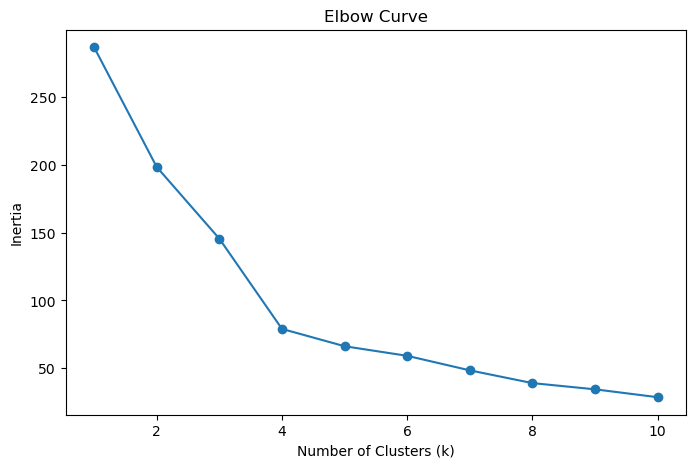

In [54]:
#Creating a list with the number of k-values from 1 to 11
k_values = range(1, 11)

#Creating an empty list to store the inertia values
inertia = []

#inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

#Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


In [55]:
#Getting the K-means model with the optimal value of k
kmeans = KMeans(n_clusters=4, random_state=0)

#Fit the model to the scaled data
kmeans.fit(scaled_df)

#Predicting the clusters
clusters = kmeans.predict(scaled_df)

#Creating a copy of the scaled DataFrame and add a new column with the predicted clusters
scaled_df['Cluster'] = clusters

#Printing the first 5 rows of the DataFrame
print(scaled_df.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [56]:
#Creating a scatter plot
scaled_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters'
)


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

In [57]:
#PCA model
pca = PCA(n_components=3)

#Fit and transform the scaled data
pca_data = pca.fit_transform(scaled_df.drop(columns=['Cluster']))

#Getting the explained variance 
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_)}")

#Creating a new DataFrame with the PCA data
pca_df = pd.DataFrame(
    pca_data,
    columns=['PC1', 'PC2', 'PC3'],
    index=scaled_df.index
)

#Printing the first few rows of the PCA DataFrame
print(pca_df.head())


Explained Variance Ratio: [0.3719856  0.34700813 0.17603793]
Total Explained Variance: 0.8950316570309841
                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

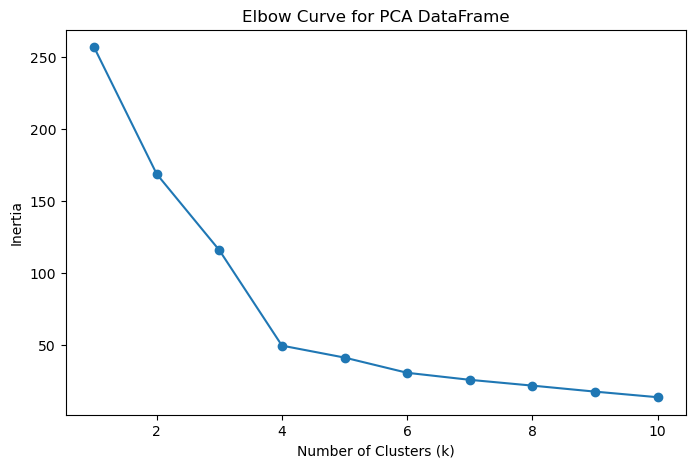

In [58]:
#Creating a list with the number of k-values from 1 to 11
k_values_pca = range(1, 11)

#Creating an empty list to store the inertia values
inertia_pca = []

#inertia for each k
for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(pca_df)
    inertia_pca.append(kmeans_pca.inertia_)

#Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values_pca, inertia_pca, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for PCA DataFrame')
plt.show()


In [59]:
#Starting the K-means model with the optimal value of k (4)
kmeans_pca = KMeans(n_clusters=4, random_state=0)

#Fit the model to the PCA data
kmeans_pca.fit(pca_df)

#Predicing the clusters
clusters_pca = kmeans_pca.predict(pca_df)

#Adding the predicted clusters to the PCA DataFrame
pca_df['Cluster'] = clusters_pca

#Printing the first few rows of the PCA DataFrame with clusters
print(pca_df.head())


                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        2


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [60]:
#Creating a scatter plot using hvPlot
pca_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters (PCA)'
)


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

In [61]:
#Creating the elbow comparision plot
elbow_curve_original = pd.DataFrame({'k': k_values, 'inertia': inertia}).hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve (Original Data)',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia'
)

elbow_curve_pca = pd.DataFrame({'k': k_values_pca, 'inertia': inertia_pca}).hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve (PCA Data)',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia'
)

#Combining the plots
elbow_curve_original + elbow_curve_pca


:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [62]:
#Scatter plot for clusters from the original data
scatter_original = scaled_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Clusters from Original Data'
)

#Scatter plot for clusters from the PCA-transformed data
scatter_pca = pca_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Clusters from PCA Data'
)

#Combining the plots
scatter_original + scatter_pca


:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,coin_id)